<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_5_ML_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# def f(x, y):
#     return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def f(x, y):
    return 2 * x ** 2 - 4 * x * y + y ** 4 + 2

def grad(x, y):
    dx = 2 * x - 2 + 100 * (-4 * y * x + 4 * x ** 3)
    dy = 100 * (2 * y - 2 * x ** 2)
    return (dx, dy)

def dist (x1, x2):
    return ((x2[0] - x1[0]) * (x2[0] - x1[0]) + (x2[1] - x1[1]) * (x2[1] - x1[1]))**0.5

In [40]:
x0 = (2, 2)
gamma = 1e-3
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if dist(x_new, x_cur) < 1e-9:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    # print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
    #       f" f(x)={f(*x_cur):.5f}; grad f(x)=({grad(*x_cur)[0]:.5f}, {grad(*x_cur)[1]:.5f})")
print(f"iter={i}; x=({x_cur[0]:.10f}, {x_cur[1]:.10f});"
        f" f(x)={f(*x_cur):.5f}; grad f(x)=({grad(*x_cur)[0]:.5f}, {grad(*x_cur)[1]:.5f})")

iter=32273; x=(1.0000011178, 1.0000022400); f(x)=1.00000; grad f(x)=(0.00000, 0.00000)


In [23]:
import matplotlib.pyplot as plt
import numpy as np

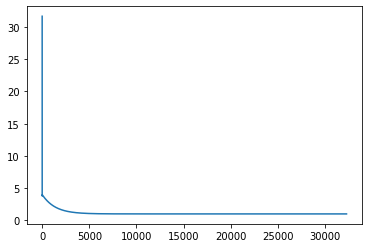

In [41]:
plt.plot(vals);

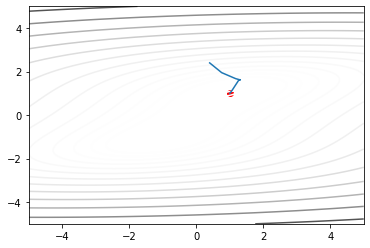

In [42]:
n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-5; b=5. # extreme points in the x-axis
c=-5; d=5. # extreme points in the y-axis
X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(-0.5, 3, 21),cmap='gray_r');
plt.plot([c[0] for c in coords], [c[1] for c in coords]);
plt.scatter(1,1,c='red');

In [31]:
coords

[(382.022, 21.6),
 (-22297357.885433856, 29205.441696799993),
 (4.4342503099543905e+21, 99434433757588.22),
 (-3.4875513154357785e+64, 3.932515162266121e+42)]

In [ ]:
def dist(x1, x2):
    return (x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2

In [43]:
from scipy import optimize

In [44]:
def f_for_scipy(x):
    return f(x[0], x[1])

In [49]:
optimize.minimize(lambda x: f(*x), x0=(0, 0)) 

      fun: 2.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])